Here is the code used to generate each of the figures in the paper:

In [1]:
import ProjectFunctions1 as pf
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.colors as colors

Load in each of the sample data. Make sure you have the relevant files in your home directory, or else add the path to the start of each filename eg. 'Downloads/...':

In [26]:
#These are somewhat hacky arrays of lopsidedness values at each radius. The 0th component is an array with 125 entries
#each for a different radius. Each entry is a list of each galaxyies lopsidedness at that radius. The 1st component is a list of the radii
#The only thing you need to use these for is investigating changing the radius range we averaged over
disks=pf.csvtoarray(files=['results_simple_zcut'])
offset=pf.csvtoarray(files=['Downloads/Offset_bar_data_for_asymmetry_aa2811_results.csv'])
massmatched=pf.csvtoarray(['mass_matched_to_offset_bars_zcut_simple'])
#These are easier to work with, its a list of dictionaries for each galaxy. Each dictionary has most of the ubertable field for that galaxy
#Please note they're all stored as strings, so to use them put float(...) around the entries
#Useful ones are i['averagelopsided']=lopsidedness averaged over radius range used in paper
                #i['LOGMSTAR_BALDRY06]
                #i['IVAN_DENSITY]
                #i['AVG'] Star formation. Not all of these have this, so include if not i['AVG']=='' when selecting
                #float(i['MU'])-float(i['MR']) colour
diskdict=pf.csvtodict(files=['results_zcut'])
offsetdict=pf.csvtodict(['Offsetgalspecubertable'])
massmatcheddict=pf.csvtodict(['mass_matched_to_offset_bars_zcut']) #Mass matched to offset bars
nonlopsidedmassmatcheddict=pf.csvtodict(['mass_matched_to_lopsided_disks_zcut.csv'])

#These are used for fig 17 - mass matched samples of very lopsided and non-lopsided disks
vlopsided=pf.csvtodict(['results_zcut_very_lopsided.csv'])
standardnonlopsided=pf.csvtodict(['normal_mass_matched_to_extreme_lopsided_disks_zcut.csv'])


In [3]:
#Make subset of disk dict that's lopsided
lopsided75=np.percentile(pf.averageover(starti=12, endi=108, listoflists=offset[0]),25) #Lopsidedness threshold
lopsideddiskdict=[]
for i in diskdict:
    if float(i['averagelopsided'])>lopsided75:
        lopsideddiskdict.append(i)

Figs 1 & 2 are just images.

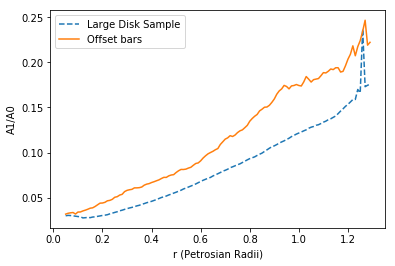

In [4]:
#FIGURE 3
disksaverager=[np.mean(i) for i in disks[0]] #average lopsidedness at each radius
offsetaverager=[np.mean(i) for i in offset[0]]
rs=[float(i) for i in disks[1]] #list of the relevant radius'
plt.plot(rs, disksaverager, label='Large Disk Sample', linestyle='dashed')
plt.plot(rs, offsetaverager, label='Offset bars')
plt.xlabel('r (Petrosian Radii)')
plt.ylabel('A1/A0')
#plt.title('A1/A0 vs. radius, averaged for a sample of disks and offset bars')
plt.legend()
plt.show()

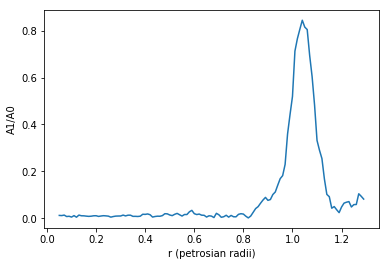

In [5]:
#Figure 4
foregroundstar=[0.012327411,0.011640877,0.013714695,0.007594368,0.008724241,0.005288514,0.011403233,0.004731864,0.013816688,0.010789911,0.010604644,0.009312432,0.008290338,0.009032724,0.010781468,0.010990491,0.008136293,0.009836062,0.011162911,0.010379494,0.00925925,0.005040369,0.007588865,0.009393231,0.009768232,0.009893032,0.013709866,0.010241874,0.013299403,0.013334635,0.008318385,0.00842768,0.0078265,0.009057382,0.017320508,0.01676256,0.018588661,0.015200106,0.005286755,0.007723376,0.009050463,0.0088066,0.011474535,0.019591423,0.019059312,0.014157887,0.011416184,0.016995725,0.020976051,0.015260053,0.009593792,0.016241318,0.016126071,0.027709958,0.033895659,0.019798962,0.016068927,0.018101903,0.013314147,0.012883292,0.005457935,0.01075833,0.009423746,0.003203264,0.021260698,0.015241273,0.004353082,0.006834961,0.012994883,0.005002691,0.012210994,0.006601863,0.006384961,0.016895174,0.019613048,0.018072855,0.008955056,0.001682377,0.009817783,0.025726609,0.041574413,0.049779866,0.064486917,0.078050865,0.08917092,0.076595706,0.079971139,0.101338087,0.112244205,0.141312145,0.169051127,0.18196498,0.229841824,0.359488957,0.44196951,0.519421779,0.712839491,0.765709938,0.80577072,0.84435314,0.815266171,0.804653786,0.69467647,0.603873437,0.482748276,0.332098391,0.29038585,0.254734491,0.168163617,0.101947948,0.092067621,0.04308588,0.050062253,0.036588172,0.024150402,0.048130262,0.064638549,0.068643537,0.071307591,0.048292991,0.05838206,0.0588853,0.104631168,0.093964447,0.08196688]
plt.plot(np.arange(0.05,1.3,0.01),foregroundstar)
plt.xlabel('r (petrosian radii)')
plt.ylabel('A1/A0')
plt.show()

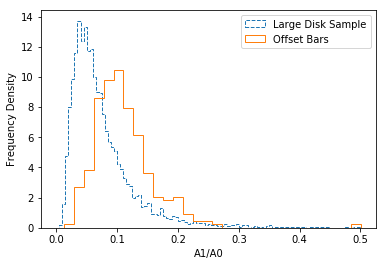

In [9]:
#Figure 5 & 7
#Comment out as neccecary. The averageover function averages between 0.17-1.13 petrorad (that's what the 12 & 108 mean, because we started at 0.05, you add 5 to the index to get the radius limit)
#plt.hist(pf.averageover(12,108,massmatched[0]), 30, density=True,histtype='step', range=(0, 0.5),label='Mass Matched Disk Sample', linestyle='dashed')
plt.hist(pf.averageover(12,108, disks[0]), 100, density=True,histtype='step', range=(0,0.5), label='Large Disk Sample', linestyle='dashed')
plt.hist(pf.averageover(12,108, offset[0]), 30, density=True,histtype='step', label='Offset Bars')
plt.xlabel('A1/A0')
plt.ylabel('Frequency Density')
#plt.title('Asymmetry Parameter for a mass matched sample of Disks and Non-Offset Bars averaged between r=0.17 and r=1.13 petrosian radii')
plt.legend()
plt.show()

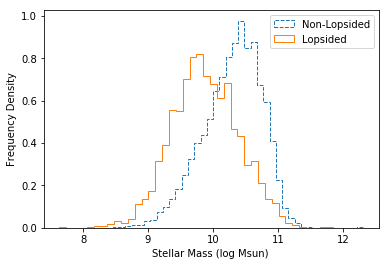

In [10]:
#Figure 6 & 14
#Comment out as neccecary - see labels
plt.hist([float(i['LOGMSTAR_BALDRY06']) for i in diskdict if float(i['averagelopsided'])<lopsided75], density=True, label='Non-Lopsided', histtype='step', bins=40, linestyle='dashed')
plt.hist([float(i['LOGMSTAR_BALDRY06']) for i in diskdict if float(i['averagelopsided'])>lopsided75], density=True,label='Lopsided', histtype='step', bins=40)
#plt.hist([float(i['LOGMSTAR_BALDRY06']) for i in diskdict], label='Large Disk Sample', density=True, histtype='step', linestyle='dashed', bins=50)
#plt.hist([float(i['LOGMSTAR_BALDRY06']) for i in offsetdict], label='Offset Bars', density=True, histtype='step', bins=15)
plt.legend()
#plt.title('Mass distribution')
plt.xlabel('Stellar Mass (log Msun) ')
plt.ylabel('Frequency Density')
plt.show()


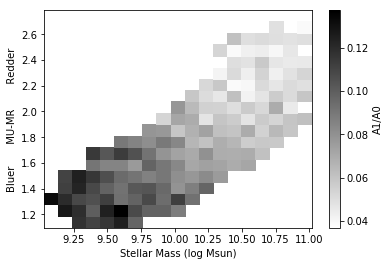

In [13]:
#Figure 8 
#Colour vs. mass vs  mean lopsided.
#Masses and colours are x and y coordiantes
masses=[float(i['LOGMSTAR_BALDRY06']) for i in diskdict]
colours=[float(i['MU'])-float(i['MR']) for i in diskdict]
#Lopsidedness is the value we want to calculate statistics for
lopsidedness=[float(i['averagelopsided']) for i in diskdict]
#Exclude top &bottom 2% from each, and calculate 20 equall spaced bins
xbins=np.linspace(np.percentile(masses,2),np.percentile(masses,98), num=20)
ybins=np.linspace(np.percentile(colours,2),np.percentile(colours,98), num=20)
#Calculate average lopsidedness & counts in each bin
fractions, x_edges, y_edges, binnumber = scipy.stats.binned_statistic_2d(x=masses, y=colours, values=lopsidedness, statistic='mean', bins=[xbins, ybins])
counts, x_edges, y_edges, binnumber = scipy.stats.binned_statistic_2d(x=masses, y=colours, values=lopsidedness, statistic='count', bins=[xbins,ybins])
#Remove bins with less than 25 galaxies occupying
for i,j in np.ndenumerate(counts):
    if counts[i]<20:
        fractions[i]='NaN'
plt.pcolormesh(x_edges,y_edges,fractions.transpose(), cmap='gray_r')
plt.colorbar(label='A1/A0')
plt.ylabel('Bluer       MU-MR        Redder')
plt.xlabel('Stellar Mass (log Msun)')
#plt.title('Average lopsidedness in bin as a function of mass and colour')
plt.show()

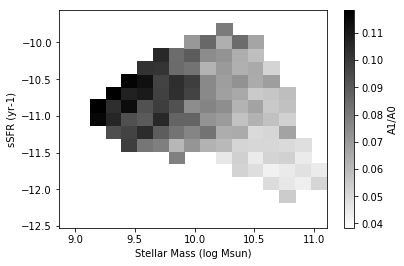

In [14]:
#Figure 9
#Specific star formation vs. mass vs  mean lopsided. EQUAL BIN SIZES
#Masses and colours are x and y coordiantes
masses=[float(i['LOGMSTAR_BALDRY06']) for i in diskdict if not i['AVG']=='' ]
ssfr=[(float(i['AVG'])-float(i['LOGMSTAR_BALDRY06'])) for i in diskdict if not i['AVG']=='']
#Lopsidedness is the value we want to calculate statistics for
lopsidedness=[float(i['averagelopsided']) for i in diskdict if not i['AVG']=='']
#Exclude top &bottom 2% from each, and calculate equall spaced bins
xbins=np.linspace(np.percentile(masses,1),np.percentile(masses,99), num=18)
ybins=np.linspace(np.percentile(ssfr,1),np.percentile(ssfr,99), num=18)
#Calculate average lopsidedness & counts in each bin
fractions, x_edges, y_edges, binnumber = scipy.stats.binned_statistic_2d(x=masses, y=ssfr, values=lopsidedness, statistic='mean', bins=[xbins, ybins])
counts, x_edges, y_edges, binnumber = scipy.stats.binned_statistic_2d(x=masses, y=ssfr, values=lopsidedness, statistic='count', bins=[xbins,ybins])
#Remove bins with less than 10 galaxies occupying
for i,j in np.ndenumerate(counts):
    if counts[i]<25:
        fractions[i]='NaN'
plt.pcolor(x_edges,y_edges,fractions.transpose(), cmap='gray_r')
plt.colorbar(label='A1/A0')
plt.ylabel('sSFR (yr-1)')
plt.xlabel('Stellar Mass (log Msun)')
#plt.title('Average lopsidedness in bin as a function of mass and sSFR')
plt.show()

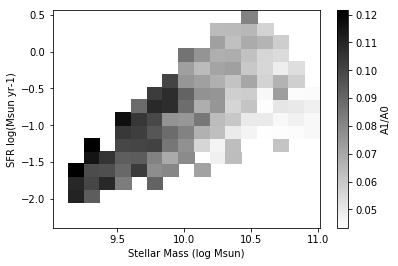

In [15]:
#Figure 10 
#Specific star formation vs. mass vs  mean lopsided. EQUAL BIN SIZES
#Masses and colours are x and y coordiantes
masses=[float(i['LOGMSTAR_BALDRY06']) for i in diskdict if not i['AVG']=='' ]
sfr=[float(i['AVG']) for i in diskdict if not i['AVG']=='']
#Lopsidedness is the value we want to calculate statistics for
lopsidedness=[float(i['averagelopsided']) for i in diskdict if not i['AVG']=='']
#Exclude top &bottom 2% from each, and calculate equall spaced bins
xbins=np.linspace(np.percentile(masses,2),np.percentile(masses,98), num=18)
ybins=np.linspace(np.percentile(sfr,2),np.percentile(sfr,98), num=18)
#Calculate average lopsidedness & counts in each bin
fractions, x_edges, y_edges, binnumber = scipy.stats.binned_statistic_2d(x=masses, y=sfr, values=lopsidedness, statistic='mean', bins=[xbins, ybins])
counts, x_edges, y_edges, binnumber = scipy.stats.binned_statistic_2d(x=masses, y=sfr, values=lopsidedness, statistic='count', bins=[xbins,ybins])
#Remove bins with less than 10 galaxies occupying
for i,j in np.ndenumerate(counts):
    if counts[i]<25:
        fractions[i]='NaN'
plt.pcolor(x_edges,y_edges,fractions.transpose(), cmap='gray_r')
plt.colorbar(label='A1/A0')
plt.ylabel('SFR log(Msun yr-1)')
plt.xlabel('Stellar Mass (log Msun)')
#plt.title('Mean lopsidedness in bin as a function of mass and SFR')
plt.show()

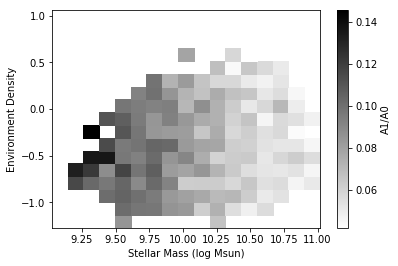

In [16]:
#Figure 11
#Environment star formation vs. mass vs  mean lopsided. EQUAL BIN SIZES
#Masses and colours are x and y coordiantes
masses=[float(i['LOGMSTAR_BALDRY06']) for i in diskdict if float(i['IVAN_DENSITY'])>-800]
ivandensities=[float(i['IVAN_DENSITY']) for i in diskdict if float(i['IVAN_DENSITY'])>-800]
#Lopsidedness is the value we want to calculate statistics for
lopsidedness=[float(i['averagelopsided']) for i in diskdict if float(i['IVAN_DENSITY'])>-800]
#Exclude top &bottom 2% from each, and calculate equall spaced bins
xbins=np.linspace(np.percentile(masses,2),np.percentile(masses,98), num=18)
ybins=np.linspace(np.percentile(ivandensities,2),np.percentile(ivandensities,98), num=18)
#Calculate average lopsidedness & counts in each bin
fractions, x_edges, y_edges, binnumber = scipy.stats.binned_statistic_2d(x=masses, y=ivandensities, values=lopsidedness, statistic='mean', bins=[xbins, ybins])
counts, x_edges, y_edges, binnumber = scipy.stats.binned_statistic_2d(x=masses, y=ivandensities, values=lopsidedness, statistic='count', bins=[xbins,ybins])
#Remove bins with less than 10 galaxies occupying
for i,j in np.ndenumerate(counts):
    if counts[i]<25:
        fractions[i]='NaN'
plt.pcolor(x_edges,y_edges,fractions.transpose(), cmap='gray_r')
plt.colorbar(label='A1/A0')
plt.ylabel('Environment Density')
plt.xlabel('Stellar Mass (log Msun)')
#plt.title('Average lopsidedness in bin as a function of mass and environment')
plt.show()

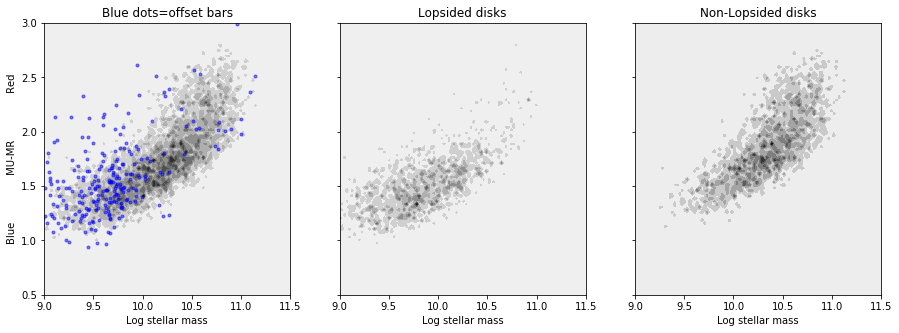

In [18]:
#Figure 12
fig, (ax1, ax2, ax3)=plt.subplots(1,3, figsize=(15,5), sharey=True)
#Colour mass, all disks
hist1=ax1.hist2d([float(i['LOGMSTAR_BALDRY06']) for i in diskdict], [float(i['MU'])-float(i['MR']) for i in diskdict], bins=100, range=[[9,11.5],[0.5,3]], cmap='gray_r', alpha=1)
ax1.contourf(hist1[0].transpose(), extent=[9,11.5, 0.5,3],cmap='gray_r')
#Add offset bars
ax1.plot([float(i['LOGMSTAR_BALDRY06']) for i in offsetdict], [float(i['MU'])-float(i['MR']) for i in offsetdict], 'b.',alpha=0.5)
ax1.set(title='Blue dots=offset bars',
    xlabel='Log stellar mass', ylabel='Blue               MU-MR               Red')
#Lopsided
hist2=ax2.hist2d([float(i['LOGMSTAR_BALDRY06']) for i in lopsideddiskdict], [float(i['MU'])-float(i['MR']) for i in lopsideddiskdict], bins=100, range=[[9,11.5],[0.5,3]], cmap='gray_r', alpha=1)
ax2.contourf(hist2[0].transpose(), extent=[9,11.5, 0.5,3],cmap='gray_r')
ax2.set(xlabel='Log stellar mass', title='Lopsided disks'
       )
#Non-Lopsided
hist3=ax2.hist2d([float(i['LOGMSTAR_BALDRY06']) for i in diskdict if float(i['averagelopsided'])<lopsided75], [float(i['MU'])-float(i['MR']) for i in diskdict if float(i['averagelopsided'])<lopsided75], bins=100, range=[[9,11.5],[0.5,3]], cmap='gray_r', alpha=1)
ax3.contourf(hist3[0].transpose(), extent=[9,11.5, 0.5,3],cmap='gray_r')
ax3.set(xlabel='Log stellar mass', title='Non-Lopsided disks'
       )
plt.show()

In [20]:
#Give it an array of galaxy lopsidednesses, and it spits out the fraction that are lopsided - used in fig 13
def fractionlopsided(x):
    return(len([i for i in x if i>lopsided75])/len(x))


[9.140742184444445, 9.3618812733333332, 9.5830203622222214, 9.8041594511111114, 10.025298540000001, 10.24643762888889, 10.467576717777778, 10.688715806666668, 10.909854895555558] [ 0.71986971  0.65932203  0.58995816  0.48917402  0.37096774  0.27473807
  0.18590522  0.15169367  0.13360324]


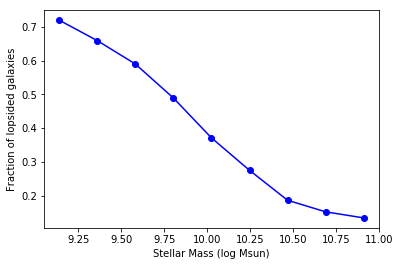

In [21]:
#Figure 13
masses=[float(i['LOGMSTAR_BALDRY06']) for i in diskdict]
lopsidedness=[float(i['averagelopsided']) for i in diskdict]
equalsized_mass_bins=np.linspace(np.percentile(masses,2),np.percentile(masses,98),10)
mass_lopsidedness_fractions , bin_edges, binnumber = scipy.stats.binned_statistic(masses, lopsidedness, bins=equalsized_mass_bins, statistic=fractionlopsided )
bin_populations= scipy.stats.binned_statistic(masses, lopsidedness, bins=equalsized_mass_bins, statistic='count' )
bin_centres=[bin_edges[i]*0.5+bin_edges[i+1]*0.5 for i in range(len(bin_edges)-1)]
plt.plot(bin_centres,mass_lopsidedness_fractions, 'bo-')
print(bin_centres, mass_lopsidedness_fractions)
plt.ylabel('Fraction of lopsided galaxies')
#plt.title('Fraction Lopsided vs Mass')
plt.xlabel('Stellar Mass (log Msun)')
plt.show()

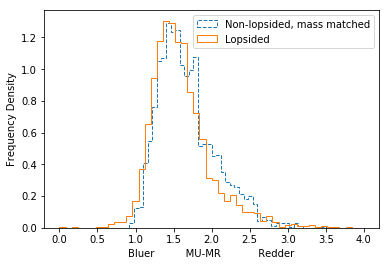

In [22]:
#Figure 15
plt.hist([(float(i['MU'])-float(i['MR'])) for i in nonlopsidedmassmatcheddict], label='Non-lopsided, mass matched', density=True, histtype='step', bins=50, range=[0.5,3.5], linestyle='dashed')
plt.hist([(float(i['MU'])-float(i['MR'])) for i in diskdict if float(i['averagelopsided'])>lopsided75], label='Lopsided', density=True, histtype='step', bins=50,range=[0,4])
plt.legend()
plt.xlabel('Bluer          MU-MR            Redder')
plt.ylabel('Frequency Density')
plt.show()

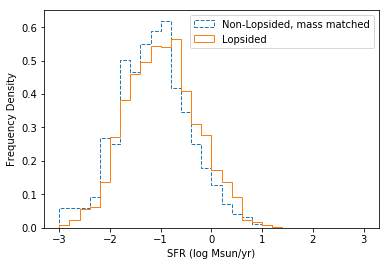

In [24]:
#Figure 16
plt.hist([float(i['AVG']) for i in nonlopsidedmassmatcheddict  if not i['AVG']==''], label='Non-Lopsided, mass matched', density=True, histtype='step', bins=30, range=(-3,3), linestyle='dashed')
plt.hist([float(i['AVG']) for i in diskdict if float(i['averagelopsided'])>lopsided75 and not i['AVG']==''], label='Lopsided', density=True, histtype='step', bins=30, range=(-3,3))
plt.legend(loc=1)
#plt.title('Star Formation rates for mass matched samples of lopsided and non lopsided disks')
plt.ylabel('Frequency Density')
plt.xlabel('SFR (log Msun/yr)')
plt.show()

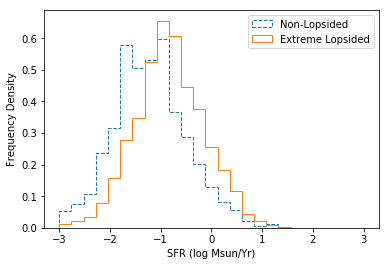

In [27]:
#FIgure 17
plt.hist([float(i['AVG']) for i in standardnonlopsided if not i['AVG']==''], histtype='step', range=(-3,3), density=True, bins=25, label='Non-Lopsided', linestyle='dashed')
plt.hist([float(i['AVG']) for i in vlopsided if not i['AVG']==''], histtype='step', bins=25,density=True, range=(-3,3), label='Extreme Lopsided')
plt.legend()
plt.xlabel('SFR (log Msun/Yr)')
plt.ylabel('Frequency Density')

plt.show()

In [28]:
#Figure 18 was snapshots of: imrun708dwfDiffLF.00330.pa0.inc0.fits (top) and imrun708dwfDiffLF.00970.pa0.inc0.fits

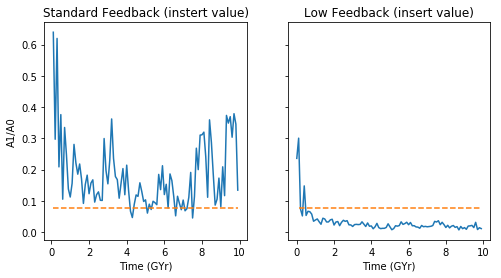

In [30]:
#Figure 19
simulationssimple=pf.csvtoarray(['victor_results_fraction_petrorad.csv'])
fig,(ax1,ax2)=plt.subplots(1,2, figsize=(8,4), sharey=True)
ax1.plot(np.arange(0.1,10,0.1), pf.averageover(12,108,simulationssimple[0])[0:99])
ax1.plot(np.arange(0.1,10,0.1), [0.0777 for i in np.arange(0.1,10,0.1)], linestyle='dashed', label='Lopsidedness Threshold')
ax2.plot(np.arange(0,10,0.1),pf.averageover(12,108,simulationssimple[0])[99:])
ax2.plot(np.arange(0.1,10,0.1), [0.0777 for i in np.arange(0.1,10,0.1)], linestyle='dashed',label='Lopsidedness Threshold')
ax1.set(xlabel='Time (GYr)', ylabel='A1/A0', title='Standard Feedback (instert value)')
ax2.set(xlabel='Time (GYr)', title='Low Feedback (insert value)')
plt.show()

In [31]:
#Figure A.1 - use same code as for figure 5, but replace the (12,108) in pf.averageover to (18,112), which changes the radius range aeraged over from
#0.17-1.13 to 0.23-1.17